In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package
from sklearn.model_selection import train_test_split # split dataset
from sklearn.metrics import mean_squared_error as mse # Measurement metric

In [2]:
import os
data = pd.read_csv('/Users/alyssa/Documents/FTW/Day_5/LAB/nyc-rolling-sales.csv')

In [3]:
!pip install pandas_profiling

In [4]:
import pandas_profiling as pp

In [5]:
report = pp.ProfileReport(data)

In [88]:
data['SALE_PRICE'] = pd.to_numeric(data['SALE_PRICE'], errors = 'coerce')
data['SALE_PRICE'] = data['SALE_PRICE'].fillna(0)
data['SALE_PRICE'].isna().sum()

0

In [112]:
data['ZIP_CODE'] = pd.to_numeric(data['ZIP_CODE'], errors = 'coerce')
data['ZIP_CODE'] = data['ZIP_CODE'].fillna(0)
data['ZIP_CODE'].isna().sum()

0

KeyError: 'BOROUGH'

In [113]:
data['GROSS_SQUARE_FEET'] = pd.to_numeric(data['GROSS_SQUARE_FEET'], errors = 'coerce')
data['GROSS_SQUARE_FEET'] = data['GROSS_SQUARE_FEET'].fillna(0)
data['GROSS_SQUARE_FEET'].isna().sum()

0

In [114]:
data['TOTAL_UNITS'] = pd.to_numeric(data['TOTAL_UNITS'], errors = 'coerce')
data['TOTAL_UNITS'] = data['TOTAL_UNITS'].fillna(0)
data['TOTAL_UNITS'].isna().sum()

0

In [134]:
data['YEAR_BUILT'] = pd.to_numeric(data['YEAR_BUILT'], errors = 'coerce')
data['YEAR_BUILT'] = data['YEAR_BUILT'].fillna(0)
data['YEAR_BUILT'].isna().sum()

0

In [135]:
data = data[data['SALE_PRICE'] > 10000] 
data = data[data['GROSS_SQUARE_FEET'] > 0]
data = data[data['ZIP_CODE'] > 0]
data = data[data['TOTAL_UNITS'] > 0]
data = data[data['YEAR_BUILT'] > 0]

In [116]:
data['SALE_PRICE'].describe()

count    2.123000e+03
mean     1.812089e+06
std      9.935182e+06
min      1.500000e+04
25%      4.460580e+05
50%      6.050000e+05
75%      9.000000e+05
max      2.033450e+08
Name: SALE_PRICE, dtype: float64

In [136]:
borough = pd.get_dummies(data['BOROUGH'])
borough

,1,2,3,4,5
11,1,0,0,0,0
234,1,0,0,0,0
239,1,0,0,0,0
937,1,0,0,0,0
950,1,0,0,0,0
...,...,...,...,...,...
84527,0,0,0,0,1
84528,0,0,0,0,1
84529,0,0,0,0,1
84546,0,0,0,0,1


In [137]:
new_data = pd.concat([data, borough], axis = 1, sort = False)
new_data.head()

,Unnamed_0,BOROUGH,NEIGHBORHOOD,BUILDING_CLASS_CATEGORY,TAX_CLASS_AT_PRESENT,BLOCK,LOT,EASE-MENT,BUILDING_CLASS_AT_PRESENT,ADDRESS,...,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,BUILDING_CLASS_AT_TIME_OF_SALE,SALE_PRICE,SALE_DATE,1,2,3,4,5
11,15,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,,D1,530-532 EAST 5TH STREET,...,2009,2,D1,10350000.0,2016-10-17 00:00:00,1,0,0,0,0
234,238,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2B,695,6,,D6,559 WEST 23RD STREET,...,2014,2,D6,4600000.0,2016-11-29 00:00:00,1,0,0,0,0
239,243,1,CHELSEA,08 RENTALS - ELEVATOR APARTMENTS,2,794,11,,D7,155 WEST 18TH,...,2014,2,D7,2341975.0,2016-10-28 00:00:00,1,0,0,0,0
937,941,1,CHELSEA,22 STORE BUILDINGS,4,696,28,,K1,507 WEST 24TH,...,2013,4,K1,10750000.0,2016-12-28 00:00:00,1,0,0,0,0
950,954,1,CHELSEA,25 LUXURY HOTELS,4,801,71,,H1,152 WEST 26TH STREET,...,2010,4,H1,139725000.0,2016-12-05 00:00:00,1,0,0,0,0


In [139]:
features = ['ZIP_CODE', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'TOTAL_UNITS', 1, 2, 3, 4, 5]
X = new_data[features]

In [120]:
X.tail()

,ZIP_CODE,GROSS_SQUARE_FEET,TOTAL_UNITS,1,2,3,4,5
84527,10309,1798.0,2,0,0,0,0,1
84528,10309,1470.0,2,0,0,0,0,1
84529,10309,2206.0,2,0,0,0,0,1
84546,10309,64117.0,7,0,0,0,0,1
84547,10309,2400.0,1,0,0,0,0,1


In [140]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

transformed_data = scaler.transform(X)

transformed_data_df = pd.DataFrame(transformed_data, columns=X.columns)

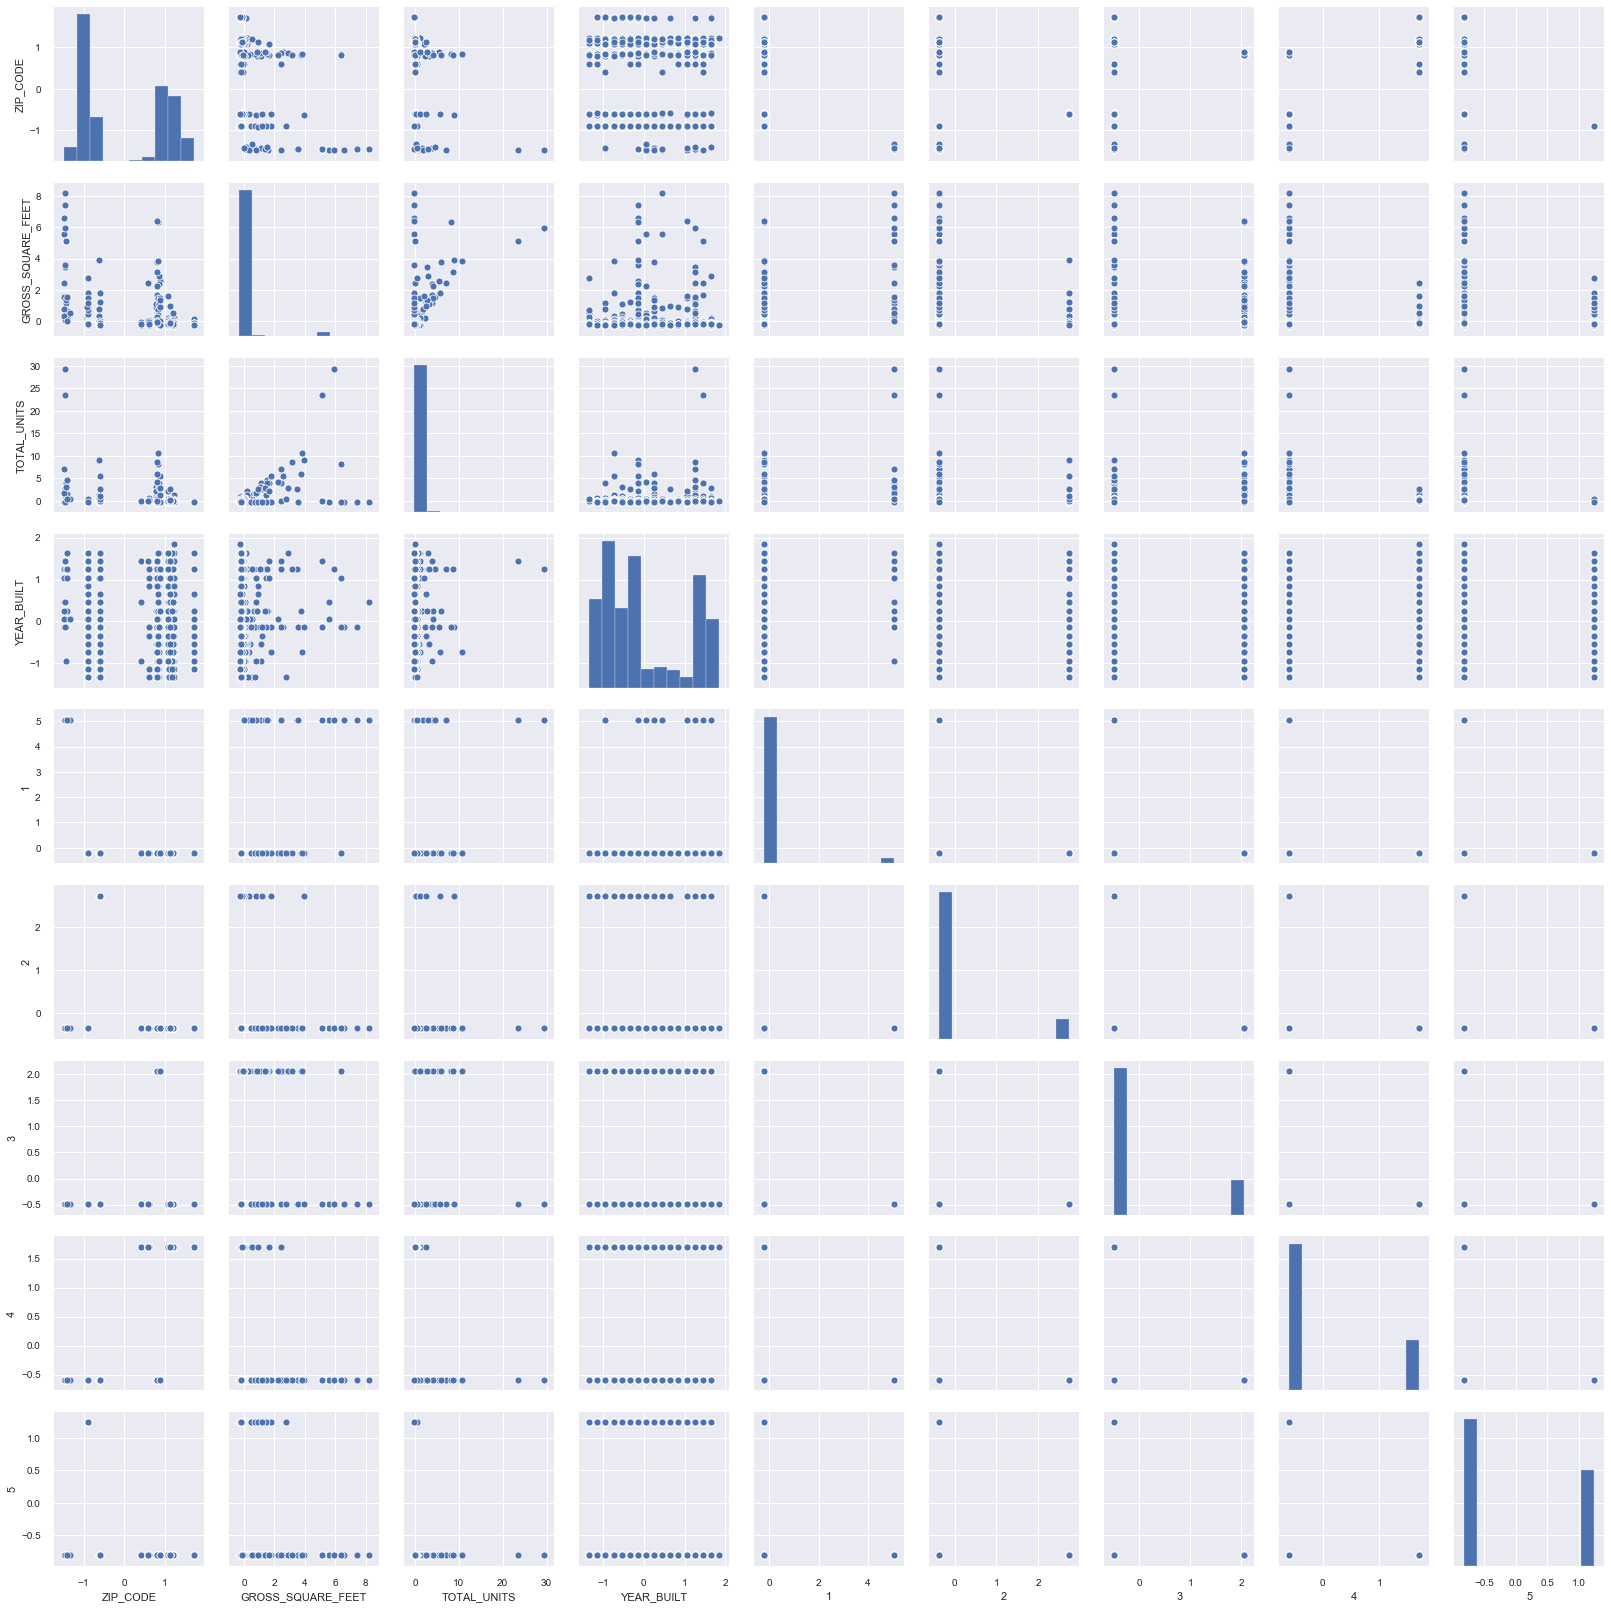

In [99]:
sns.pairplot(transformed_data_df)

In [ ]:
bins = [-0.01, 1, 2, 3, 4, 5, 6]
group_names = ['']

In [34]:
X.head()

,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,TOTAL_UNITS,YEAR_BUILT,BOROUGH
11,3717.0,12350.0,10,2009,1
234,2469.0,19892.0,7,2014,1
239,10053.0,78882.0,32,2014,1
937,3950.0,7900.0,1,2013,1
950,9826.0,122236.0,1,2010,1


In [141]:
y = data['SALE_PRICE']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [143]:
model = LinearRegression()

In [144]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
coefficient = model.coef_
intercept = model.intercept_

In [146]:
coefficient

array([-2.83440939e+03,  1.28168142e+02,  6.86512140e+04,  4.75904641e+05,
        5.24992035e+05, -1.98191352e+06,  1.33215864e+06,  1.66532545e+06,
       -1.54056260e+06])

In [147]:
intercept

-107416128.76018016

In [148]:
model.score(X_test, y_test)

0.5549004617567752

In [149]:
y_predicted = model.predict(X_test)

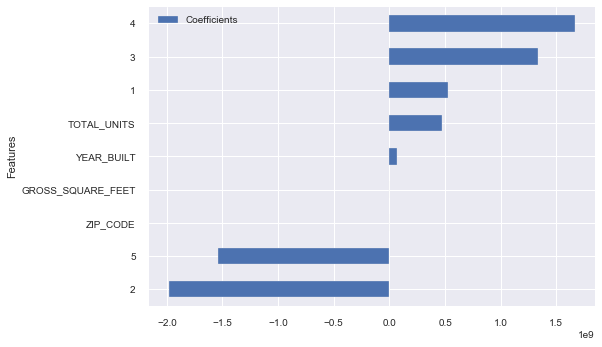

In [150]:
coefficients_pd = pd.DataFrame((list(zip(features, model.coef_ * 1000))), columns = ['Features', 'Coefficients'])
coefficients_pd.sort_values('Coefficients').set_index('Features').plot(kind = 'barh', color = 'b')

In [151]:
coefficients_pd

,Features,Coefficients
0,ZIP_CODE,-2.834409e+06
1,GROSS_SQUARE_FEET,1.281681e+05
2,YEAR_BUILT,6.865121e+07
3,TOTAL_UNITS,4.759046e+08
4,1,5.249920e+08
5,2,-1.981914e+09
6,3,1.332159e+09
7,4,1.665325e+09
8,5,-1.540563e+09


In [152]:
np.sqrt(mse(y_predicted, y_test))

4870049.974526887

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_predicted)

1411088.8048133808

In [48]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predicted)

27302623825783.62